In [16]:
import warnings
warnings.filterwarnings("ignore")

In [17]:
import pandas as pd

In [33]:
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")
sub = pd.read_csv("../input/sample_submission.csv")
train.shape, test.shape

((200000, 202), (200000, 201))

In [34]:
train.head(3)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965


In [35]:
test.head(3)

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794


In [36]:
sub.head(3)

,ID_code,target
0,test_0,0
1,test_1,0
2,test_2,0


In [37]:
train.isnull().sum().sum()

0

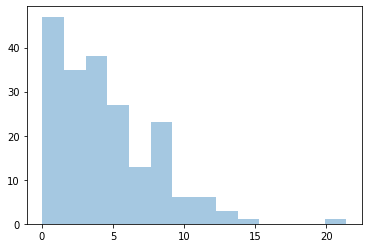

In [38]:
import seaborn as sns
train_std = train[train.columns[2:]].std()
sns.distplot(train_std, kde=False);

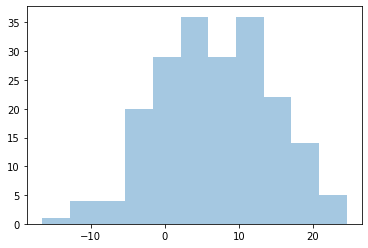

In [39]:
train_mean = train[train.columns[2:]].mean()
sns.distplot(train_mean, kde=False);

In [ ]:
#import matplotlib.pyplot as plt
#plt.figure(figsize=(26, 24))
#for i, col in enumerate(list(train.columns)[2:30]):
#    plt.subplot(7, 4, i+1)
#    sns.countplot(train[col])
#    plt.title(col)

In [40]:
train["target"].value_counts(normalize=True)

0    0.89951
1    0.10049
Name: target, dtype: float64

In [41]:
corrs = train.corr().abs().unstack().sort_values(kind="quicksort").reset_index()
corrs = corrs[corrs["level_0"] != corrs["level_1"]]
corrs.head()

,level_0,level_1,0
0,var_191,var_75,2.703975e-08
1,var_75,var_191,2.703975e-08
2,var_173,var_6,5.942735e-08
3,var_6,var_173,5.942735e-08
4,var_126,var_109,1.313947e-07


In [ ]:
#from sklearn import model_selection

#df["kfold"] = -1
#df = df.sample(frac=1).reset_index(drop=True)
#y = df.target.values
#skf = model_selection.StratifiedKFold(n_splits=5)
#for fold, (trn_idx, val_idx) in enumerate(skf.split(X=df, y=y)):
#    df.loc[val_idx, "kfold"] = fold
#df.to_csv("../input/train_folds.csv", index=False)

In [42]:
train = pd.read_csv("../input/train_folds.csv")
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,kfold
0,train_179270,0,12.6670,-8.2640,12.2246,5.1135,9.9873,-4.4061,5.8543,10.3610,...,12.3649,1.3688,4.4547,14.9203,1.2843,-6.8354,8.3008,16.9694,-0.2180,0
1,train_8620,0,7.1337,-3.3894,10.5516,4.5148,13.2428,-13.3373,5.7906,22.8352,...,10.7215,-0.7006,3.8318,11.6210,-1.2492,6.9051,8.1987,13.6408,-3.8620,0
2,train_75184,1,13.4617,-7.5920,7.8741,9.8813,8.0818,-6.9046,4.5100,15.1907,...,4.1234,1.5338,0.9601,18.4373,-1.0499,2.1792,10.3498,18.0188,-3.4607,0
3,train_197238,0,11.0380,3.9730,11.9388,9.7430,11.7759,-16.3134,6.9064,20.9315,...,11.0323,0.7727,7.8554,21.6070,-2.3528,-1.0275,8.2812,12.9121,2.5766,0
4,train_123902,0,12.1796,-6.7531,10.1425,5.3293,9.0578,-18.7689,5.3685,22.8782,...,3.7274,0.0488,7.0516,17.3483,0.7411,6.8619,10.1772,10.0919,7.0014,0


In [44]:
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import metrics
import pickle

def lr_run(fold):
    df = train
    df_train = df[df.kfold != fold].reset_index(drop=True)
    df_valid = df[df.kfold == fold].reset_index(drop=True)
    
    xtrain = df_train.drop(["ID_code", "target", "kfold"], axis=1)
    ytrain = df_train["target"]
    xvalid = df_valid.drop(["ID_code", "target", "kfold"], axis=1)
    yvalid = df_valid["target"]
    xtest = test.drop(["ID_code"], axis=1)
    
    scaler = preprocessing.StandardScaler()
    xtrain_scl = scaler.fit_transform(xtrain)
    xvalid_scl = scaler.transform(xvalid)
    xtest_scl = scaler.transform(xtest)
    
    model = linear_model.LogisticRegression(
        class_weight="balanced",
        penalty="l2",
        C=0.1,
    )
    model.fit(xtrain_scl, ytrain)
    
    preds_yvalid = model.predict(xvalid_scl)
    acc = metrics.accuracy_score(yvalid, preds_yvalid)
    print(f"Fold {fold}, Accuracy={acc:.3f}")
    
    preds_ytest = model.predict(xtest_scl)
    sub["target"] = preds_ytest
    sub.to_csv(f"../input/sub_lr_{fold}.csv", index=False)
    
    with open(f"../model_preds/lr_{fold}.pickle", mode="wb") as fp:
        pickle.dump(model, fp)

        
if __name__ == "__main__":
    for j in range(5):
        lr_run(j)

Fold 0, Accuracy=0.779
Fold 1, Accuracy=0.782
Fold 2, Accuracy=0.780
Fold 3, Accuracy=0.781
Fold 4, Accuracy=0.784


In [45]:
import lightgbm as lgb

def lgb_run(fold):
    df = train
    df_train = df[df.kfold != fold].reset_index(drop=True)
    df_valid = df[df.kfold == fold].reset_index(drop=True)
    
    xtrain = df_train.drop(["ID_code", "target", "kfold"], axis=1)
    ytrain = df_train["target"]
    xvalid = df_valid.drop(["ID_code", "target", "kfold"], axis=1)
    yvalid = df_valid["target"]
    xtest = test.drop(["ID_code"], axis=1)
    
    model = lgb.LGBMClassifier()
    model.fit(xtrain, ytrain)
    
    preds_yvalid = model.predict(xvalid)
    acc = metrics.accuracy_score(yvalid, preds_yvalid)
    print(f"Fold {fold}, Accuracy={acc:.3f}")
    
    importance = pd.DataFrame()
    importance["feature"] = xtrain.columns
    importance["importance"] = model.feature_importances_
    importance.to_csv(f"../input/lgb_importance_{fold}.csv", index=False)
    
    preds_ytest = model.predict(xtest)
    sub["target"] = preds_ytest
    sub.to_csv(f"../input/sub_lgb_{fold}.csv", index=False)
    
    with open(f"../model_preds/lgb_{fold}.pickle", mode="wb") as fp:
        pickle.dump(model, fp)

        
if __name__ == "__main__":
    for j in range(5):
        lgb_run(j)

Fold 0, Accuracy=0.907
Fold 1, Accuracy=0.908
Fold 2, Accuracy=0.908
Fold 3, Accuracy=0.907
Fold 4, Accuracy=0.908


In [47]:
import eli5

model_path = "../model_preds/lgb_0.pickle"

with open(model_path, mode="rb") as fp:
    model = pickle.load(fp)

xtrain = train.drop(["ID_code", "target", "kfold"], axis=1)

eli5.show_weights(
    model, 
    targets=[0, 1], 
    feature_names=list(xtrain.columns), 
    top=40,
    feature_filter=lambda x: x != '<BIAS>',
)

Weight,Feature
0.0364,var_81
0.0299,var_139
0.0257,var_12
0.0219,var_53
0.0217,var_110
0.0212,var_26
0.0197,var_146
0.0196,var_174
0.0196,var_80
0.0195,var_6
